### 목표
- 머신러닝기반 데이터 분석 프로세스를 이해하자.
- 데이터 전처리, 탐색적 데이터 분석을 실습해보자.
- 타이타닉 탑승객의 생존여부를 예측분석 해보자.

#### 데이터 분석 프로세스
1. 문제 정의
2. 데이터 수집
3. 데이커 전처리(preprocession)
4. 탐색적 데이터분석(EDA)
5. 모델링(정의, 학습, 예측)
6. 모델평가
7. 모델활용 및 겨로가 리포팅

#### 1. 문제정의
- kaggle의 타이타닉 데이커를 분석해보자.(생존자 예측 분석)
- 지도학습 이용 -> 분류 -> 이진분류 

#### 2. 데이터 수집
- kaggle에 업로드된 데이터 활용
- train.csv, test.csv 활용

In [78]:
# EDA를 위한 분석 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#검증 데이터 분리를 위한 함수
from sklearn.model_selection import train_test_split
#학습을 위한 모델 클래스
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#평가를 위한 함수(정확도)
from sklearn.metrics import accuracy_score

In [79]:
train = pd.read_csv("./data/titanic/train.csv", index_col="PassengerId")
test = pd.read_csv("./data/titanic/test.csv" , index_col="PassengerId")
display("Train")
display(train.head())
display("Test")
display(test.head())

'Train'

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


'Test'

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### 3. 데이터 전처리 ~ 4. 탐색적데이터분석(EDA)

##### 1. 전체 데이터 수 파악

In [80]:
train.shape, test.shape

((891, 11), (418, 10))

##### 2. 결측치 파악

In [81]:
train.info()
train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [82]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

- train 결측치 : Age, Cabin, Embarked
- test 결측치 : Age, Cabin, Fare

##### 3. 결측치 채우기

In [83]:
display(train[['Age','Cabin','Embarked']].describe(include='all'))

,Age,Cabin,Embarked
count,714.000000,204,889
unique,NaN,147,3
top,NaN,B96 B98,S
freq,NaN,4,644
mean,29.699118,NaN,NaN
std,14.526497,NaN,NaN
min,0.420000,NaN,NaN
25%,20.125000,NaN,NaN
50%,28.000000,NaN,NaN
75%,38.000000,NaN,NaN


In [84]:
test[['Age','Cabin','Fare']].describe()

,Age,Fare
count,332.000000,417.000000
mean,30.272590,35.627188
std,14.181209,55.907576
min,0.170000,0.000000
25%,21.000000,7.895800
50%,27.000000,14.454200
75%,39.000000,31.500000
max,76.000000,512.329200


In [85]:
# Fare 채우기 (수치데이터 -  평균, 중앙값 등)
test['Fare'].fillna(14,inplace=True)
# Embarked 채우기 (범주형데이터 - 최빈값 등)
train['Embarked'].fillna('S',inplace=True)

In [86]:
# 채운 결측치 확인
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [87]:
# Age 채우기 - 상관관계 및 데이터 그룹핑을 이용
display(train.corr()) # 상관계수 확인
display(train.corr()['Age']) #Age의 상관계수 확인

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Survived   -0.077221
Pclass     -0.369226
Age         1.000000
SibSp      -0.308247
Parch      -0.189119
Fare        0.096067
Name: Age, dtype: float64

- Pclass가 Age와 반비례 관계를 가진다.(상관계수:-0.36)
- 등급숫자가 높아질수록 나이대가 어려진다.
- 그리고 시대적 배경을 고려해 남성과 여성도 활용하자.

In [88]:
# 등급과 성별을 모두 이용해 그룹핑을 하고
# 나이의 중앙 값을 계산시켜보자.
train[['Age','Pclass','Sex']].groupby(by=['Pclass','Sex']).median()

Age
Pclass Sex         
1      female  35.0
       male    40.0
2      female  28.0
       male    30.0
3      female  21.5
       male    25.0

In [89]:
# 데이터 채우기
age_data=train[['Age','Pclass','Sex']].groupby(by=['Pclass','Sex']).transform('median')

In [90]:
train['Age'].fillna(age_data['Age'], inplace=True)

In [91]:
train['Age'].isnull().sum()

0

In [92]:
# test age 채우기
age_data_test=test[['Age','Pclass','Sex']].groupby(by=['Pclass','Sex']).transform('median')  # transform : 값 바로넣어줌
test['Age'].fillna(age_data_test['Age'], inplace=True)

In [93]:
test['Age'].isnull().sum()

0

In [94]:
# cabin 채우기
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

- 결츨치 비율이 너무 높기 떄문에 대체값을 추정하는것 보다는 결측치로 인정하는 값을 넣자.
- 고유값이 너무 많아서 앞글자만 따서 정리하자

In [95]:
train['Cabin']=train['Cabin'].str[0]

In [96]:
train['Cabin'].fillna('M', inplace=True)   
train['Cabin'].unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [97]:
# test cabin 채우기
test['Cabin']=test['Cabin'].str[0]
test['Cabin'].fillna('M', inplace=True)   
test['Cabin'].unique()

array(['M', 'B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object)

- train에는 T가 있는데 test에는 없다

#### 범주형 데이터 시각화
- 빈도기반의 시각화 방법 활용 : bar차트, pie차트

##### 4. 성별에 따른 생존여부 시각화

<AxesSubplot:xlabel='Sex', ylabel='count'>

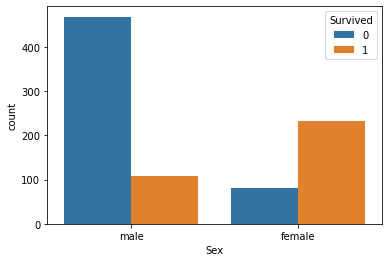

In [98]:
sns.countplot(data=train, x="Sex", hue="Survived")

##### 5. 등급에 따른 생존여부 시각화

<AxesSubplot:xlabel='Pclass', ylabel='count'>

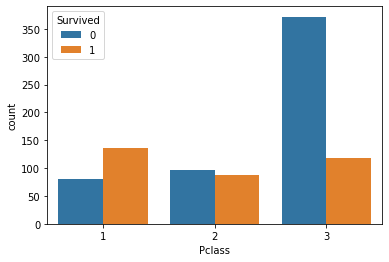

In [99]:
 # 갯수를 세서 그래프로(범주형)
sns.countplot(data=train, x='Pclass', hue='Survived') 

<AxesSubplot:xlabel='Embarked', ylabel='count'>

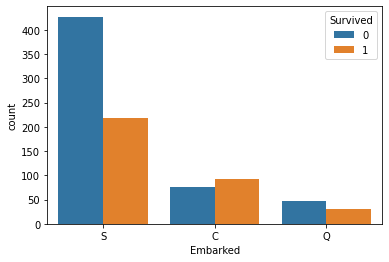

In [100]:
sns.countplot(data=train, x='Embarked', hue='Survived') 

##### 7. Cabin에 따른 생존여부 시각화

<AxesSubplot:xlabel='Cabin', ylabel='count'>

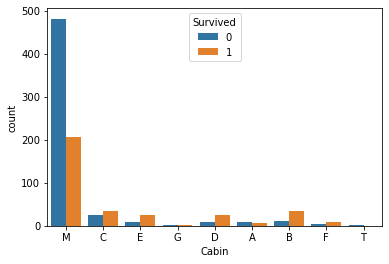

In [101]:
sns.countplot(data=train, x='Cabin', hue='Survived') 

##### 8. 등급과 성별을 묶어서 시각화

In [102]:
train['Dead'] = 1- train['Survived']

<AxesSubplot:xlabel='Pclass,Sex'>

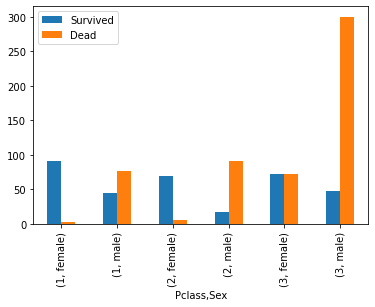

In [103]:
train[['Sex','Pclass','Survived','Dead']].groupby(by=['Pclass','Sex']).sum().plot(kind='bar')

##### 9. Cabin과 Pclass를 묶어서 시각화

<AxesSubplot:xlabel='Cabin', ylabel='count'>

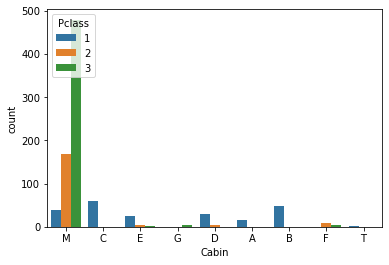

In [104]:
sns.countplot(data=train, x="Cabin", hue="Pclass")

#### 수치형 데이터 시각화 
- 시계열 데이터 : line그래프
- 두 수치데이터 사이의 관계 확인 : scatter 그래프 (산점도)
- 수치데이터를 구간화해서 분포보는 경우 : 히스토그램, KDE(커널밀도추정,정규분포를 많이씀)
- 사분위수를 이용해서 데이터 분포를 보는 경우 : box plot

##### 10. Age 히스토그램

<AxesSubplot:ylabel='Frequency'>

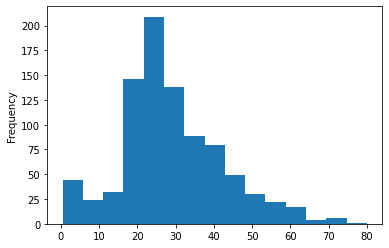

In [105]:
train['Age'].plot(kind='hist', bins=15) #15개 구간으로 나눔

##### 11. Age커널밀도추정 그래프

<AxesSubplot:xlabel='Age', ylabel='Density'>

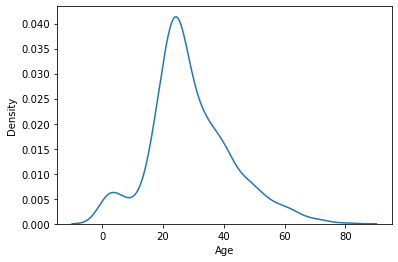

In [106]:
sns.kdeplot(train['Age'])

##### 12. Fare boxplot

<AxesSubplot:>

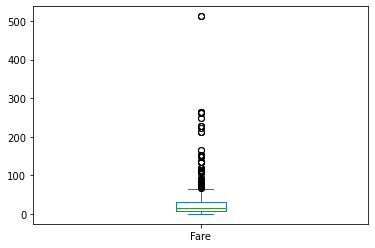

In [107]:
train['Fare'].plot(kind='box')  #이상치 확인 가능

##### 13. Age와 Survived, Sex를 결합한 시각화
- violin plot (KDE를 세운것과 같음...)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

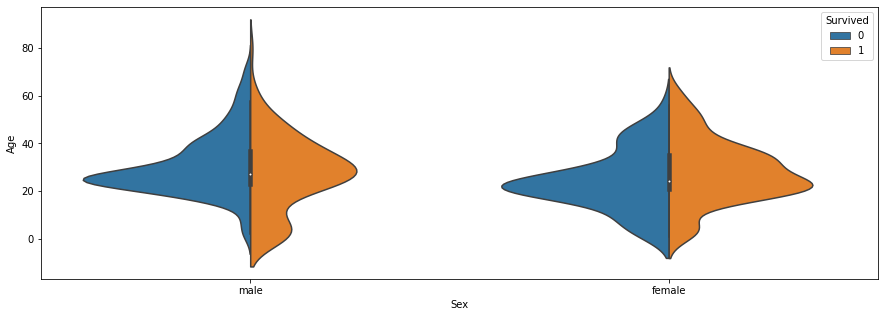

In [108]:
plt.figure(figsize=(15,5)) # 그림 크기 설정
sns.violinplot(data=train,   #사용할 데이터
                x='Sex', # x축 컬럼
                y='Age', # y축 컬럼
                hue='Survived', #데이터를 분리할 컬럼
                split=True) # 분리된거를 절반으로 쪼개서 병합 

- 나이가 10살 미만인 사람중에 남자아이가 살 확률이 높다.
- 성별과 나이가 함께 학습되면 도움이 될 수 있다.

#### 특성공학

##### 14. 파생변수(새로운 feature) 생성
- Parch, Sibsp를 합쳐서 가족이라는 컬럼을 만들자.

<AxesSubplot:xlabel='Parch', ylabel='count'>

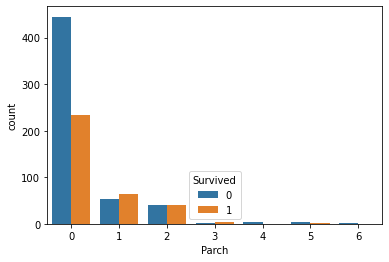

In [109]:
#Parch시각화
sns.countplot(data=train, x='Parch', hue='Survived')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

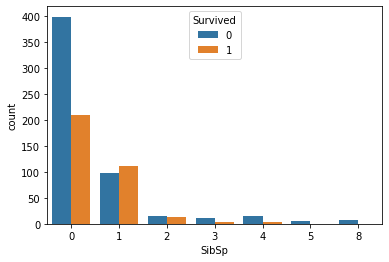

In [110]:
#SibSp시각화
sns.countplot(data=train, x='SibSp', hue='Survived')

In [111]:
train['Family'] = train['Parch'] + train['SibSp']

<AxesSubplot:xlabel='Family', ylabel='count'>

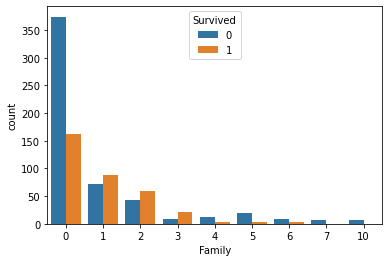

In [112]:
# Family
sns.countplot(data=train, x='Family', hue='Survived')

- 혼자 탑승한 사람은 죽은 사람의 비율 높다
- 1~3명의 가족이 있으면 산 사람의 비율이 살짝 높다
- 4명 이상의 가족이 있으면 죽은 사람의 비율이 살짝 높다.
- binning(구간화) 작업을 통해 Family컬럼을 범주형으로 변경해보자.(구간화가 무조건 좋다는건 아니지만 데이터가 복잡하게 갈수 있는것을 막아 줄수있다.)

##### 15. binning(수치형 -> 범주형)
- Family 컬럼을 Family_cut컬럼으로 만들어보자
- 범주의 종류(Alone, Small, Large)

In [113]:
#구간화 작업
bins=[-1,0,3,20]  #0~1, 1~3, 4~20(test 데이터에서 10명 이상이 있을 수 있으니 넉넉히 20으로)
cat=['Alone','Small','Large']
Family_cut = pd.cut(train['Family'],bins=bins,labels=cat)
Family_cut

PassengerId
1      Small
2      Small
3      Alone
4      Small
5      Alone
       ...  
887    Alone
888    Alone
889    Small
890    Alone
891    Alone
Name: Family, Length: 891, dtype: category
Categories (3, object): ['Alone' < 'Small' < 'Large']

In [114]:
train['Family_cut'] = Family_cut

In [115]:
# test 데이터 적용
test['Family'] = test['Parch']+test['SibSp']
Family_cut_test= pd.cut(test['Family'],bins=bins,labels=cat)
test['Family_cut'] = Family_cut_test

##### 16. Name 컬럼 다루기
- 이름 중간에 호칭을 추출해 Title이라는 컬럼을 만들어보자.

In [116]:
train['Title']=train['Name'].str.split(",").str[1].str.split(".").str[0].str.strip() # 공백제거

In [117]:
# test 데이터 적용
test['Title']=test['Name'].str.split(",").str[1].str.split(".").str[0].str.strip()

In [118]:
# 호칭 종류 정리하기
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [119]:
# Mr, Miss, Mrs, Master,Other로 통합하자
train['Title'].value_counts()  #value 하나씩 있는것들은 축약시키는게 모델 덜 복잡해짐

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [120]:
# title_dict = {
#     'Mr':'Mr',
#     'Mrs':'Mrs',
#     'Miss':'Miss',
#     'Master':'Master',
#     'Don':'Other',
#     'Rev':'Other',
#     'Dr':'Other',
#     'Mme':'Other',
#     'Ms':'Other',
#     'Major':'Other',
#     'Lady':'Other',
#     'Sir':'Other',
#     'Mlle':'Other',
#     'Col':'Other',
#     'Capt':'Other',
#     'the Countess':'Other',
#     'Jonkheer':'Other'
# }
# title_label=train['Title'].map(title_dict)
# title_label_test=test['Title'].map(title_dict)
# train['Title'] = title_label
# train
# test['Title'] = title_label_test
# test

In [121]:
title_vc=train['Title'].value_counts()
title_vc

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [122]:
title_dict = dict(zip(title_vc.index,['Mr','Miss','Mrs','Master']+(['Other']*(len(title_vc.index)-4))))

In [123]:
title_dict

{'Mr': 'Mr',
 'Miss': 'Miss',
 'Mrs': 'Mrs',
 'Master': 'Master',
 'Dr': 'Other',
 'Rev': 'Other',
 'Mlle': 'Other',
 'Major': 'Other',
 'Col': 'Other',
 'the Countess': 'Other',
 'Capt': 'Other',
 'Ms': 'Other',
 'Sir': 'Other',
 'Lady': 'Other',
 'Mme': 'Other',
 'Don': 'Other',
 'Jonkheer': 'Other'}

In [124]:
title_label=train['Title'].map(title_dict)
train['Title'] = title_label
train


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Dead,Family,Family_cut,Title
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,1,1,Small,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,0,1,Small,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,0,0,Alone,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,0,1,Small,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,1,0,Alone,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,M,S,1,0,Alone,Other
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,S,0,0,Alone,Miss
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.4500,M,S,1,3,Small,Miss


In [125]:
# test에 적용
title_vc_test = test['Title'].value_counts()
title_dict_test = dict(zip(title_vc_test.index,['Mr','Miss','Mrs','Master']+(['Other']*(len(title_vc_test.index)-4))))

In [126]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [127]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [128]:
test['Title'] = test['Title'].map(title_dict_test)
test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

##### 17. 인코딩(글자타입 -> 숫자타입)처리

In [129]:
# 컬럼 이름 정리
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Dead', 'Family', 'Family_cut', 'Title'],
      dtype='object')

In [130]:
feature_names=['Sex','Cabin','Embarked','Family_cut','Title']

In [131]:
# 원핫인코딩
feature_names=['Sex','Cabin','Embarked','Family_cut','Title']
train_one_hot = pd.get_dummies(train[feature_names])
train_one_hot

,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_M,...,Embarked_Q,Embarked_S,Family_cut_Alone,Family_cut_Small,Family_cut_Large,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,1,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
5,0,1,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,1,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,1
888,1,0,0,1,0,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
889,1,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,1,0,0,0


In [132]:
# test처리
test_one_hot = pd.get_dummies(test[feature_names])
test_one_hot

,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_M,...,Embarked_Q,Embarked_S,Family_cut_Alone,Family_cut_Small,Family_cut_Large,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,0,1,0,0,0,0,0,0,0,1,...,1,0,1,0,0,0,0,1,0,0
893,1,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
894,0,1,0,0,0,0,0,0,0,1,...,1,0,1,0,0,0,0,1,0,0
895,0,1,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,1,0,0
896,1,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,0,1,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,1,0,0
1306,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1307,0,1,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,1,0,0


In [133]:
# 원핫인코딩한거 붙이기
train = pd.concat([train,train_one_hot], axis=1)
test = pd.concat([test,test_one_hot], axis=1)

##### 18. 필요없는 컬럼 삭제 및 확인

In [134]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Dead', 'Family', 'Family_cut', 'Title',
       'Sex_female', 'Sex_male', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D',
       'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_M', 'Cabin_T', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Family_cut_Alone', 'Family_cut_Small',
       'Family_cut_Large', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Other'],
      dtype='object')

In [135]:
train.drop(feature_names+['Name','Ticket','Dead'],axis=1,inplace=True)

In [136]:
test.drop(feature_names+['Name','Ticket'],axis=1,inplace=True)

In [137]:
train.shape, test.shape

((891, 29), (418, 27))

In [138]:
# 부족한 컬럼이 뭔지 확인
set(train.columns)-set(test.columns)

{'Cabin_T', 'Survived'}

In [139]:
test['Cabin_T']=0

In [140]:
# 새로 추가한 Cabin_T 때문에 test의 컬럼순서가 1칸씩 밀림
# (train에만 있는 컬럼이라 학습한거와 테스트할때 다를 수 있음)
train.sort_index(axis=1,inplace=True)
test.sort_index(axis=1,inplace=True)

In [141]:
train.shape, test.shape

((891, 29), (418, 28))

In [142]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               418 non-null    float64
 1   Cabin_A           418 non-null    uint8  
 2   Cabin_B           418 non-null    uint8  
 3   Cabin_C           418 non-null    uint8  
 4   Cabin_D           418 non-null    uint8  
 5   Cabin_E           418 non-null    uint8  
 6   Cabin_F           418 non-null    uint8  
 7   Cabin_G           418 non-null    uint8  
 8   Cabin_M           418 non-null    uint8  
 9   Cabin_T           418 non-null    int64  
 10  Embarked_C        418 non-null    uint8  
 11  Embarked_Q        418 non-null    uint8  
 12  Embarked_S        418 non-null    uint8  
 13  Family            418 non-null    int64  
 14  Family_cut_Alone  418 non-null    uint8  
 15  Family_cut_Large  418 non-null    uint8  
 16  Family_cut_Small  418 non-null    uint8  

In [143]:
train

,Age,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_M,Cabin_T,...,Pclass,Sex_female,Sex_male,SibSp,Survived,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,22.0,0,0,0,0,0,0,0,1,0,...,3,0,1,1,0,0,0,1,0,0
2,38.0,0,0,1,0,0,0,0,0,0,...,1,1,0,1,1,0,0,0,1,0
3,26.0,0,0,0,0,0,0,0,1,0,...,3,1,0,0,1,0,1,0,0,0
4,35.0,0,0,1,0,0,0,0,0,0,...,1,1,0,1,1,0,0,0,1,0
5,35.0,0,0,0,0,0,0,0,1,0,...,3,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,27.0,0,0,0,0,0,0,0,1,0,...,2,0,1,0,0,0,0,0,0,1
888,19.0,0,1,0,0,0,0,0,0,0,...,1,1,0,0,1,0,1,0,0,0
889,21.5,0,0,0,0,0,0,0,1,0,...,3,1,0,1,0,0,1,0,0,0


#### 5. 모델링(정의, 학습, 예측)

In [144]:
# 모델 정의
knn_model = KNeighborsClassifier()
tree_model = DecisionTreeClassifier()

In [145]:
# 모델 학습
# 1. 문제와 정답 분리
X_train= train.drop(['Survived'],axis=1)    #inplace=True 를 넣으면 원본데이터에서도 없어지니까 넣지 않음
y_train= train['Survived']
# 2. 훈련데이터를 8:2로 분리해서 train2,val셋으로 구성
# (randomstate = 921)
X_train2,X_val,y_train2,y_val=train_test_split(X_train,y_train,test_size=0.2, random_state=921)

In [146]:
#3-1. KNN 모델 최적화
train_score_list = []   # 훈련데이터 점수 리스트
val_score_list = []   # 검증데이터 점수 리스트
for n in range(1,25):   #이웃의 숫자를 1~24명 설정
    m=KNeighborsClassifier(n_neighbors=n)
    m.fit(X_train2,y_train2)
    # 훈련데이터 예측 및 평가
    pre_train = m.predict(X_train2)
    score_train = accuracy_score(y_train2, pre_train)
    train_score_list.append(score_train)
    # 검증데이터 예측 및 평가
    pre_val = m.predict(X_val)
    score_val = accuracy_score(y_val,pre_val)
    val_score_list.append(score_val)


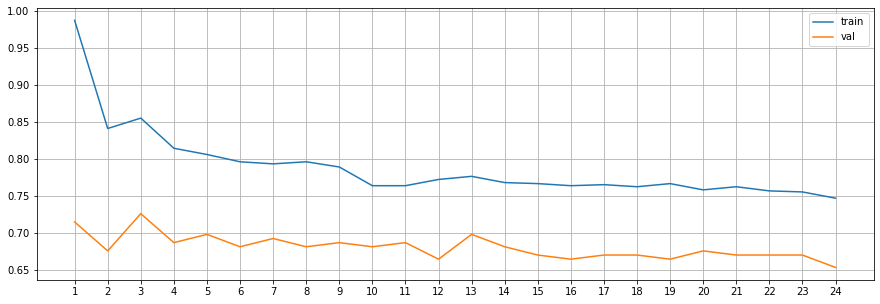

In [147]:
# 시각화 
plt.figure(figsize=(15,5)) # 그림의 크기 설정(가로,세로) 인치
plt.plot(range(1,25),train_score_list, label='train') # 라인1
plt.plot(range(1,25),val_score_list, label='val') # 라인2
plt.xticks(range(1,25)) # x축 눈금
plt.grid() # 배경 격자무늬
plt.legend() # 범례
plt.show() # 그림 보여주기


In [148]:
# 3-2 tree 모델 최적화
train_score_list=[] #훈련데이터 평가 점수가 담긴다.
val_score_list=[] #검증데이터 평가 점수가 담긴다.
for d in range(1,31): 
    m = DecisionTreeClassifier(max_depth=d) # 최대깊이가 다른 모델을 계속 생성
    m.fit(X_train2,y_train2)
    #훈련데이터 예측
    pre_train = m.predict(X_train2) 
    score_train=accuracy_score(y_train2,pre_train)
    train_score_list.append(score_train)
    #검증데이터 예측
    pre_val = m.predict(X_val)
    score_val=accuracy_score(y_val,pre_val)
    val_score_list.append(score_val)

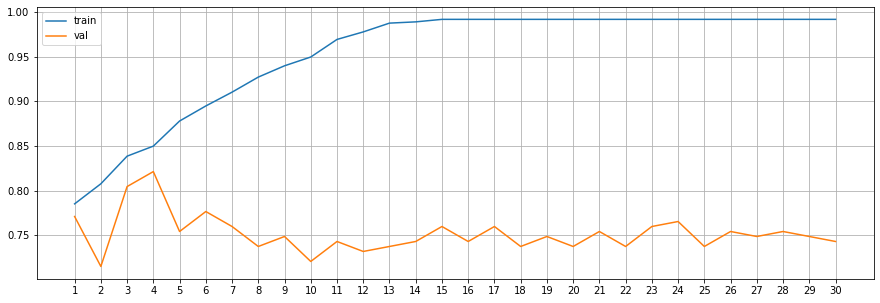

In [149]:
# 시각화 
plt.figure(figsize=(15,5)) # 그림의 크기 설정(가로,세로) 인치
plt.plot(range(1,31),train_score_list, label='train') # 라인1
plt.plot(range(1,31),val_score_list, label='val') # 라인2
plt.xticks(range(1,31)) # x축 눈금
plt.grid() # 배경 격자무늬
plt.legend() # 범례
plt.show() # 그림 보여주기

In [150]:
# 3. 최종 학습
final_knn_model = KNeighborsClassifier(n_neighbors=3)
final_knn_model.fit(X_train2,y_train2)
final_tree_model = DecisionTreeClassifier(max_depth=4)
final_tree_model.fit(X_train2,y_train2)

DecisionTreeClassifier(max_depth=4)

In [151]:
train.columns

Index(['Age', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F',
       'Cabin_G', 'Cabin_M', 'Cabin_T', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Family', 'Family_cut_Alone', 'Family_cut_Large',
       'Family_cut_Small', 'Fare', 'Parch', 'Pclass', 'Sex_female', 'Sex_male',
       'SibSp', 'Survived', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Other'],
      dtype='object')

In [152]:
# X_train= train[['Age','Family_cut_Alone','Cabin_M', 'Sex_female']]
# y_train= train['Survived']
# X_train1,X_val,y_train1,y_val=train_test_split(X_train,y_train,test_size=0.3, random_state=921)                                                                                                                       
# final_knn_model.fit(X_train1,y_train1)
# pre= final_knn_model.predict(X_val)
# pre
# score = accuracy_score(y_val,pre)
# print("정확도 : ",score)

##### 1.9 6.모델평가

In [153]:
X_train2.shape

(712, 28)

In [154]:
# kaggle 업로드해서 평가
# 28개의 feature를 가진 test데이터를 활용
knn_pre = final_knn_model.predict(test)
tree_pre = final_tree_model.predict(test)

In [156]:
# 정답지 로딩
submission = pd.read_csv("./data/titanic/gender_submission.csv")

In [158]:
#KNN 예측 값 파일로 저장
submission['Survived'] = knn_pre
submission.to_csv("./data/titanic/knn_pre1.csv", index=False)

In [ ]:
#tree 예측 값 파일로 저장
submission['Survived'] = tree_pre
submission.to_csv("./data/titanic/tree_pre1.csv", index=False)

##### 데이터 스케일링
- KNN의 경우 데이터 스케일에 영향을 많이 받는 모델이다.
- 특히 Fare가 이상치도 존재하고 다른 특성에 비해 거리 값을 조정하는데 많은 영향을 준다.
- Fare를 데이터 스케일링해서 성능개선 여부를 확인해보자.

In [160]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

<AxesSubplot:xlabel='Fare', ylabel='Density'>

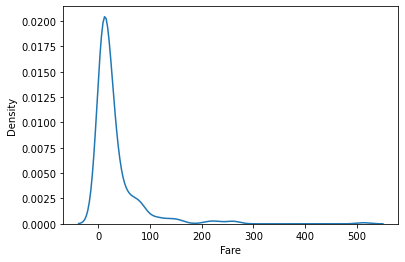

In [164]:
# 원래 요금의 분포(KDE)
sns.kdeplot(train['Fare'])    # 데이터 range가 넓게 퍼져있음

In [174]:
# 스케일링
scaler = RobustScaler()  # 스케일러 객체 생성
scaler.fit(train[['Fare']])  # 기준값 계산(4분위수)
transformed_fare = scaler.transform(train[['Fare']])  #  변환

<AxesSubplot:ylabel='Density'>

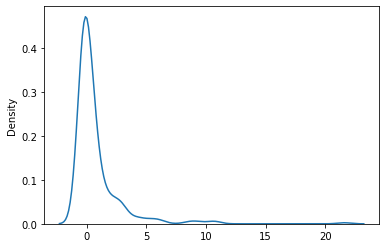

In [168]:
# 스케일링된 요금의 분포(KDE)
sns.kdeplot(transformed_fare.reshape(-1))   # reshape(-1) 차원수 하나 줄임

In [177]:
# KNN 재학습
X_train['Fare'] = transformed_fare # 스케일링된 데이터로 교체
X_train2,X_val,y_train2,y_val=train_test_split(X_train,y_train,test_size=0.2, random_state=921)
# 모델 정의 및 학습
final_knn_model2 = KNeighborsClassifier(n_neighbors=3)
final_knn_model2.fit(X_train2,y_train2)
# test 스케일링
test['Fare'] = scaler.transform(test[['Fare']])
# 스케일링된 test 데이터로 예측
knn_pre2 = final_knn_model2.predict(test)

In [178]:
# KNN 예측 값 파일로 저장
submission['Survived'] = knn_pre2
submission.to_csv("./data/titanic/knn_pre1.csv", index=False)

#### 전처리된 데이터 파일로 저장

In [ ]:
X_train.to_csv("./data/titanic/preprocessing_X_train.csv")
test.to_csv("./data/titanic/preprocessing_X_test.csv")
y_train.to_csv("./data/titanic/y_train.csv")